In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras import utils

In [27]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [28]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

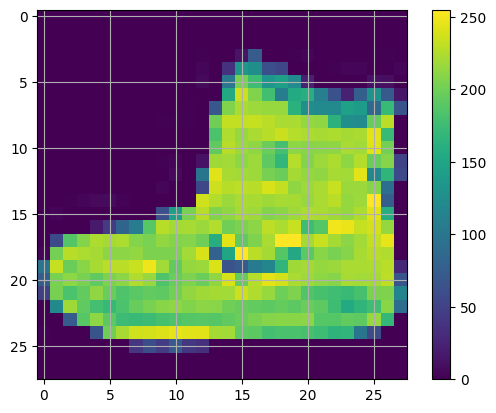

In [29]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid()

Приведем пиксели на изображениях в нормальный вид

Сейчас они **[0; 255]** , а мы сделаем **[0; 1]**

In [30]:
x_train = x_train / 255
x_test = x_test / 255

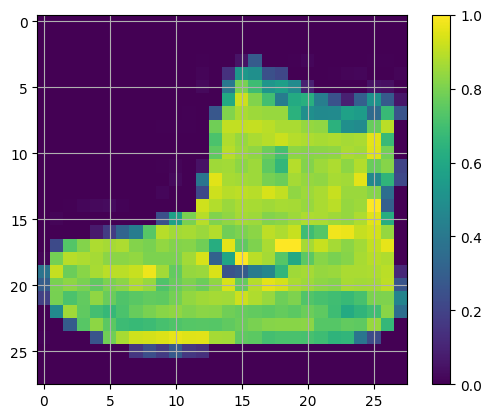

In [31]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid()

Для удобства расположим несколько изображений на одном графике

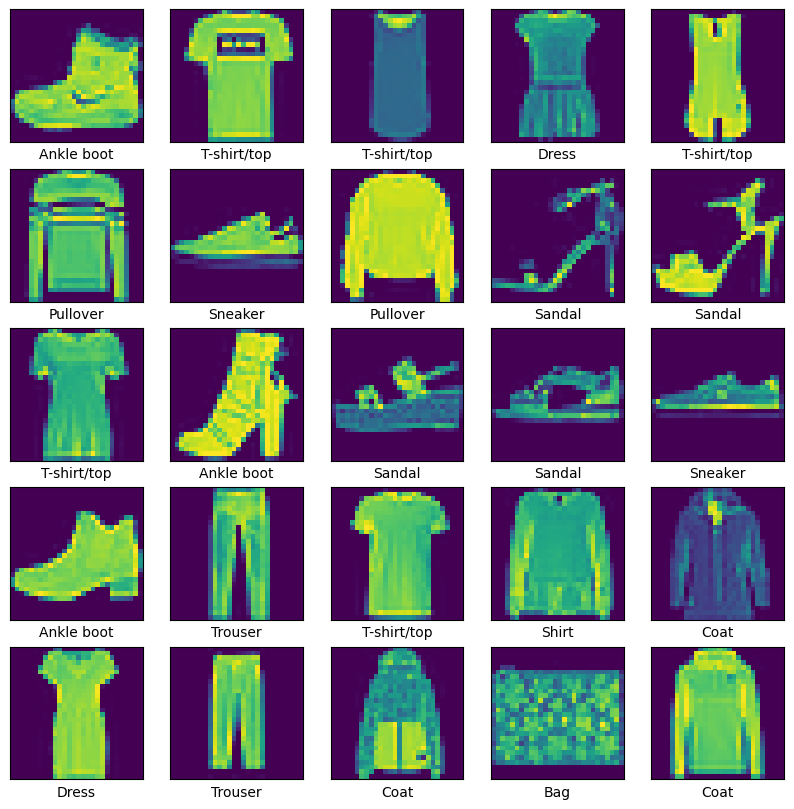

In [32]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])
  plt.xlabel(class_names[y_train[i]])

Строим нейонную сеть 

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Компеляция модели

In [37]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Посмотрим параметры можели

In [38]:
model.summary() 

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Обучим нашу модель

In [39]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7420 - accuracy: 0.7586
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5136 - accuracy: 0.8252
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4682 - accuracy: 0.8387
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4433 - accuracy: 0.8475
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4253 - accuracy: 0.8522
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4111 - accuracy: 0.8572
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4001 - accuracy: 0.8605
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3900 - accuracy: 0.8653
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3809 - accuracy: 0.8675
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.373

Теперь проверим точность моей нейронной сети на тренировочной выборке

In [40]:
test_loss, test_accurasy = model.evaluate(x_test, y_test)
print("Test accurasy: ", test_accurasy)

313/313 [==============================] - 1s 3ms/step - loss: 0.4163 - accuracy: 0.8503
Test accurasy:  0.8503000140190125


Попробуем предсказать классы на тестовой выборке

In [43]:
pred = model.predict(x_train)
pred[0]

1875/1875 [==============================] - 4s 2ms/step


array([2.4254390e-09, 2.3567914e-09, 2.1762392e-10, 6.8180511e-10,
       5.0571580e-10, 2.9161351e-04, 3.5264648e-08, 3.3583178e-04,
       9.1565453e-06, 9.9936336e-01], dtype=float32)

In [44]:
print("Prediction: ", np.argmax(pred[0]), "correct_answer: ", y_train[0])

Prediction:  9 correct_answer:  9


In [48]:
for i in range(50):
  print(f"Prediction: {class_names[np.argmax(pred[i])]}, correct_answer:  {class_names[y_train[i]]}")

Prediction: Ankle boot, correct_answer:  Ankle boot
Prediction: T-shirt/top, correct_answer:  T-shirt/top
Prediction: T-shirt/top, correct_answer:  T-shirt/top
Prediction: Shirt, correct_answer:  Dress
Prediction: Dress, correct_answer:  T-shirt/top
Prediction: Pullover, correct_answer:  Pullover
Prediction: Sneaker, correct_answer:  Sneaker
Prediction: Pullover, correct_answer:  Pullover
Prediction: Sandal, correct_answer:  Sandal
Prediction: Sandal, correct_answer:  Sandal
Prediction: T-shirt/top, correct_answer:  T-shirt/top
Prediction: Ankle boot, correct_answer:  Ankle boot
Prediction: Sandal, correct_answer:  Sandal
Prediction: Sandal, correct_answer:  Sandal
Prediction: Sneaker, correct_answer:  Sneaker
Prediction: Ankle boot, correct_answer:  Ankle boot
Prediction: Trouser, correct_answer:  Trouser
Prediction: T-shirt/top, correct_answer:  T-shirt/top
Prediction: Shirt, correct_answer:  Shirt
Prediction: Coat, correct_answer:  Coat
Prediction: Dress, correct_answer:  Dress
Pred